In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
NHAMCS = pd.read_sas(filepath_or_buffer = 'NHAMCS.sas7bdat')

,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,...,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6.0,6.0,b'2056',72.0,NaN,27.0,3.0,-7.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,21.58043
1,6.0,2.0,b'1417',64.0,NaN,1.0,1.0,-7.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
2,6.0,2.0,b'2303',-7.0,NaN,52.0,4.0,-7.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
3,6.0,5.0,b'0930',29.0,NaN,5.0,1.0,-7.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
4,6.0,2.0,b'1332',20.0,NaN,4.0,1.0,-7.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN


In [5]:
NHAMCS.head()

,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,...,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6.0,6.0,b'2056',72.0,NaN,27.0,3.0,-7.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,21.58043
1,6.0,2.0,b'1417',64.0,NaN,1.0,1.0,-7.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
2,6.0,2.0,b'2303',-7.0,NaN,52.0,4.0,-7.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
3,6.0,5.0,b'0930',29.0,NaN,5.0,1.0,-7.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
4,6.0,2.0,b'1332',20.0,NaN,4.0,1.0,-7.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN


In [8]:
NHAMCS.shape

(16709, 949)

## Exploration Plan

First, we find the NaNs.

In [12]:
nans = NHAMCS.isnull().sum()

In [15]:
nans.sort_values(ascending = False, inplace = True)

In [20]:
nans.count() # for all features

949

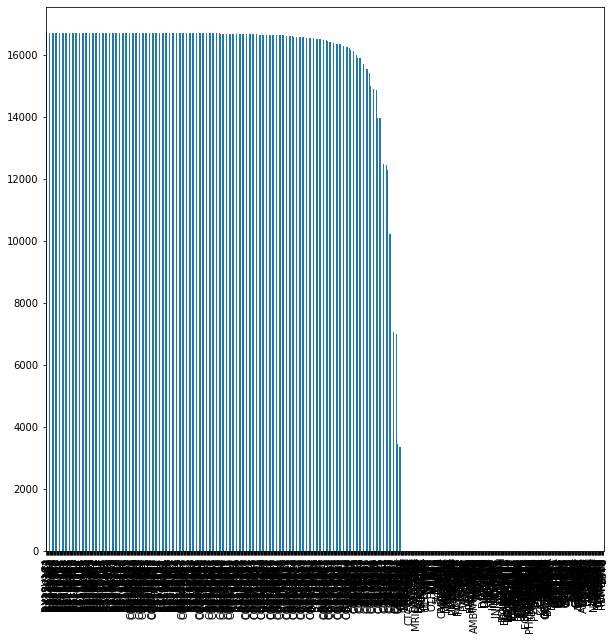

In [19]:
nans.plot(kind = 'bar', figsize = (10,10));

In [26]:
nans 

RX19V1C4    16709
RX25V1C3    16709
RX25CAT3    16709
RX24V3C4    16709
RX24V3C3    16709
            ...  
RETRNED         0
RETREFFU        0
LWBS            0
LBTC            0
VMONTH          0
Length: 949, dtype: int64

In [60]:
nans_max = nans[nans >= int(0.99*16709)]

In [61]:
nans_max.count()

448

448 features are all NaNs!

Now let's work through the remaining features.

In [62]:
nans_no_max = nans[nans < int(0.99*16709)]

Let's see those with 90% NaNs.

In [57]:
nans_90 = nans_no_max[nans_no_max >= int((0.99*16709))]

In [58]:
nans_90.count()

324

In [56]:
nans_90

RX21V3C4    16708
RX21V3C2    16708
RX14V2C3    16708
RX14V1C3    16708
RX14V1C4    16708
            ...  
RX7V1C1     15552
CONTSUB7    15552
RX3V2C2     15436
RX3V1C2     15434
RX3CAT2     15434
Length: 428, dtype: int64


In [53]:
nans_no_90 = nans_no_max[nans_no_max < int((0.9*16709))]

We only have 397 features whose missing values do not exceed 90%!

In [54]:
nans_no_90.count()

397

In [50]:
nans_70 = nans_no_max[nans_no_max > int((0.7*16709))]

In [51]:
nans_70.count()

0